<a href="https://colab.research.google.com/github/Equivocal-Richie/Linear_Algebra/blob/main/Matrix_Arithmetic_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Scenario: E-commerce Product Recommendations Based on User Ratings**

**Problem Overview:**

Imagine you work for an e-commerce platform. You have user ratings for various products, stored in a matrix. You want to use matrix arithmetic to generate product recommendations for users based on their existing ratings.

**Dataset (Conceptual):**

    User Ratings Matrix (R):
        1. Rows represent users.
        2. Columns represent products.
        3. Values represent user ratings (e.g., 1-5 stars, 0 if not rated).

## **Basic Application: Calculating Average Product Ratings**

**Question 1:**

Given the user ratings matrix R, calculate the average rating for each product.

In [ ]:
import numpy as np

# Sample user ratings matrix (where Rows=Users and Columns=Products)
R = np.array([
    [5, 4, 0, 3],  # User 1 ratings
    [4, 0, 2, 5],  # User 2 ratings
    [0, 3, 5, 1],  # User 3 ratings
    [5, 4, 4, 0],  # User 4 ratings
    [0, 5, 4, 3]   # User 5 ratings
])

# Calculate average ratings for each product (column-wise)
average_ratings = np.mean(R, axis=0)
# axis = 0 specifies that the mean should be calculated along the columns (products).

# Print average ratings for each product individually
num_products = R.shape[1]  # Get the number of products (columns)

for i in range(num_products):
    print(f"Average rating for Product {i + 1}: {average_ratings[i]}")

Average rating for Product 1: 2.8
Average rating for Product 2: 3.2
Average rating for Product 3: 3.0
Average rating for Product 4: 2.4


## **Intermediate Application: User Similarity Based on Ratings**

**Question 2:**

Calculate the similarity between users based on their ratings using dot products.

In [ ]:
from sklearn.preprocessing import normalize

# User Ratings Matrix - same as before
R = np.array([
    [5, 4, 0, 3],  # User 1 ratings
    [4, 0, 2, 5],  # User 2 ratings
    [0, 3, 5, 1],  # User 3 ratings
    [5, 4, 4, 0],  # User 4 ratings
    [0, 5, 4, 3]   # User 5 ratings
])

# Calculate user similarity matrix (dot product of user rating vectors)
# np.dot performs matrix multiplication, which in this case represents the dot product of user rating vectors.
user_similarity = np.dot(R, R.T)  # R.T is the transpose of R (swapping rows and columns)
normalized_similarity = normalize(user_similarity, axis=1, norm='l2')

k = 3  # Number of top similar users to display

for i in range(normalized_similarity.shape[0]):
    top_indices = np.argsort(normalized_similarity[i])[-k:]  # Get indices of top k similar users
    top_users = top_indices + 1  # Adjust indices to user IDs (starting from 1)
    print(f"Top {k} similar users for User {i + 1}: {top_users}")

Top 3 similar users for User 1: [2 4 1]
Top 3 similar users for User 2: [4 1 2]
Top 3 similar users for User 3: [4 3 5]
Top 3 similar users for User 4: [5 1 4]
Top 3 similar users for User 5: [4 3 5]


Heatmap visualization of the similarities between the users for a more intuitive understanding.

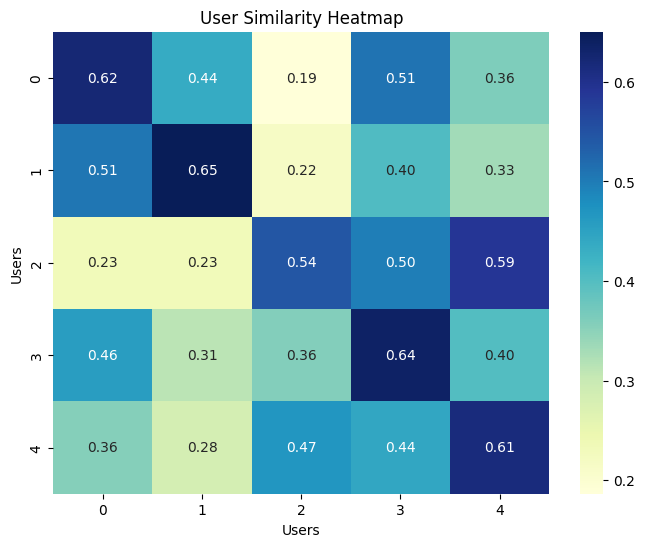

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(normalized_similarity, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("User Similarity Heatmap")
plt.xlabel("Users")
plt.ylabel("Users")
plt.show()